# Chapter 6: Loading and Wrangling Data with Pandas and NumPy

**Sources**
- [chinook](https://github.com/lerocha/chinook-database)
- [Packt Github](https://github.com/PacktPublishing/Practical-Data-Science-with-Python/tree/main/4-Chapter-4/data)

**How to read CSV file into dataframe with pandas**

In [1]:
import pandas as pd
csv_df = pd.read_csv('data/itunes_data.csv')
csv_df.head()

,Track,Composer,Milliseconds,Bytes,UnitPrice,Genre,Album,Artist
0,All the Best Cowboys Have Daddy Issues,NaN,2555492,211743651,1.99,TV Shows,"Lost, Season 1",Lost
1,Beira Mar,Gilberto Gil,295444,9597994,0.99,Latin,Unplugged,Eric Clapton
2,Brasil,"Milton Nascimento, Fernando Brant",155428,5252560,0.99,Latin,Milton Nascimento Ao Vivo,Milton Nascimento
3,Ben Franklin,NaN,1271938,264168080,1.99,Comedy,"The Office, Season 3",The Office
4,O Último Romântico (Ao Vivo),NaN,231993,7692697,0.99,Latin,Lulu Santos - RCA 100 Anos De Música - Álbum 02,Lulu Santos


**How to read `.db` file into dataframe with pandas**

In [2]:
from sqlalchemy import create_engine
engine = create_engine('sqlite:///data/chinook.db')

query = """
SELECT 
    tracks.name as Track,
    tracks.composer,
    tracks.milliseconds,
    tracks.bytes,
    tracks.unitprice,
    genres.name as Genre,
    albums.title as Album,
    artists.name as Artist
FROM tracks
    JOIN genres ON tracks.genreid = genres.genreid
    JOIN albums ON tracks.albumid = albums.albumid
    JOIN artists ON albums.artistid = artists.artistid;
"""

with engine.connect() as conn:
    sql_df = pd.read_sql_query(query, conn)
    # T = transpose, meaning it'll switche rows and columns
    #   which is useful for dataframes with a lot of columns

sql_df.head(2).T
    

,0,1
Track,For Those About To Rock (We Salute You),Put The Finger On You
Composer,"Angus Young, Malcolm Young, Brian Johnson","Angus Young, Malcolm Young, Brian Johnson"
Milliseconds,343719,205662
Bytes,11170334,6713451
UnitPrice,0.99,0.99
Genre,Rock,Rock
Album,For Those About To Rock We Salute You,For Those About To Rock We Salute You
Artist,AC/DC,AC/DC


**How to read data from excel into dataframe with Pandas**

In [3]:
excel_df = pd.read_excel('data/itunes_data.xlsx')
excel_df.head()

,Track,Composer,Milliseconds,Bytes,UnitPrice,Genre,Album,Artist
0,My Time After Awhile,Robert Geddins/Ron Badger/Sheldon Feinberg,182491,6022698,0.99,Blues,The Best Of Buddy Guy - The Millenium Collection,Buddy Guy
1,Be Quick Or Be Dead,Bruce Dickinson/Janick Gers,204512,8181888,0.99,Rock,Fear Of The Dark,Iron Maiden
2,Água E Fogo,Chico Amaral/Edgard Scandurra/Samuel Rosa,278987,9272272,0.99,Rock,Maquinarama,Skank
3,Ozone Baby,"Jimmy Page, Robert Plant",215954,7079588,0.99,Rock,Coda,Led Zeppelin
4,Bop Boogie,NaN,189596,6093124,0.99,Jazz,Up An' Atom,Gene Krupa


**Combining different DataFrames**

_Note: can also use `.merge()`_

In [7]:
itunes_df = pd.concat([csv_df, excel_df, sql_df])

# Join along columns, where only rows with matching index are joined
# itunes_df = pd.concat([csv_df, excel_df, sql_df], axis=1, join='inner')

itunes_df.tail()

,Track,Composer,Milliseconds,Bytes,UnitPrice,Genre,Album,Artist
3498,Pini Di Roma (Pinien Von Rom) \ I Pini Della V...,None,286741,4718950,0.99,Classical,Respighi:Pines of Rome,Eugene Ormandy
3499,"String Quartet No. 12 in C Minor, D. 703 ""Quar...",Franz Schubert,139200,2283131,0.99,Classical,Schubert: The Late String Quartets & String Qu...,Emerson String Quartet
3500,"L'orfeo, Act 3, Sinfonia (Orchestra)",Claudio Monteverdi,66639,1189062,0.99,Classical,Monteverdi: L'Orfeo,"C. Monteverdi, Nigel Rogers - Chiaroscuro; Lon..."
3501,"Quintet for Horn, Violin, 2 Violas, and Cello ...",Wolfgang Amadeus Mozart,221331,3665114,0.99,Classical,Mozart: Chamber Music,Nash Ensemble
3502,Koyaanisqatsi,Philip Glass,206005,3305164,0.99,Soundtrack,Koyaanisqatsi (Soundtrack from the Motion Pict...,Philip Glass Ensemble


In [21]:
# Looking at a specific row (ex: last row in data frame)
print(itunes_df.iloc[-1])

Track                                               Koyaanisqatsi
Composer                                             Philip Glass
Milliseconds                                               206005
Bytes                                                         NaN
UnitPrice                                                    0.99
Genre                                                  Soundtrack
Album           Koyaanisqatsi (Soundtrack from the Motion Pict...
Artist                                      Philip Glass Ensemble
Name: 3502, dtype: object


**Display number of rows and columns in dataframe**

In [27]:
print(itunes_df.shape)

(4021, 8)


**Displaying datatypes and other info of dataframe**

In [28]:
itunes_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4021 entries, 0 to 3502
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Track         4021 non-null   object 
 1   Composer      2908 non-null   object 
 2   Milliseconds  4021 non-null   int64  
 3   Bytes         4021 non-null   int64  
 4   UnitPrice     4021 non-null   float64
 5   Genre         4021 non-null   object 
 6   Album         4021 non-null   object 
 7   Artist        4021 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 282.7+ KB


**Finding number of missing values (`NaN`) for each column in dataframe**

In [29]:
itunes_df.isna().sum()

Track              0
Composer        1113
Milliseconds       0
Bytes              0
UnitPrice          0
Genre              0
Album              0
Artist             0
dtype: int64

**Display statistical properties of the dataframe**

_Applies to numerical datatype columns only_

In [30]:
itunes_df.describe()

,Milliseconds,Bytes,UnitPrice
count,4.021000e+03,4.021000e+03,4021.000000
mean,3.927276e+05,3.311048e+07,1.050184
std,5.337745e+05,1.042268e+08,0.237857
min,1.071000e+03,3.874700e+04,0.990000
25%,2.069680e+05,6.372433e+06,0.990000
50%,2.554770e+05,8.102839e+06,0.990000
75%,3.217240e+05,1.025143e+07,0.990000
max,5.286953e+06,1.059546e+09,1.990000


**Histogram of song lengths**

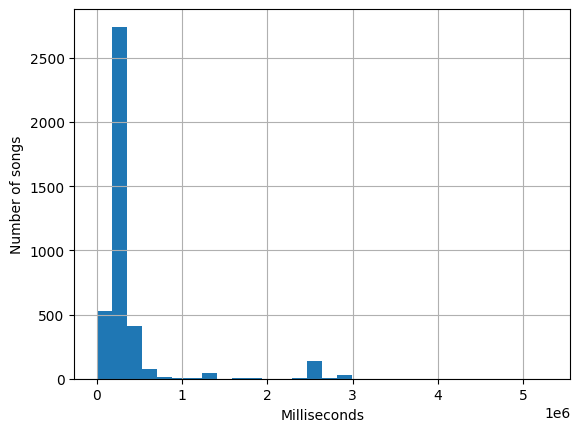

In [37]:
import matplotlib.pyplot as plt

# bins: how many bars histogram is broken up into; more bars means more precise
itunes_df['Milliseconds'].hist(bins=30)

# Milliseconds is in 1*10^6 scientific notation
plt.xlabel('Milliseconds')
plt.ylabel('Number of songs')

plt.show()

**Scatterplot of song length and song size (bytes)**

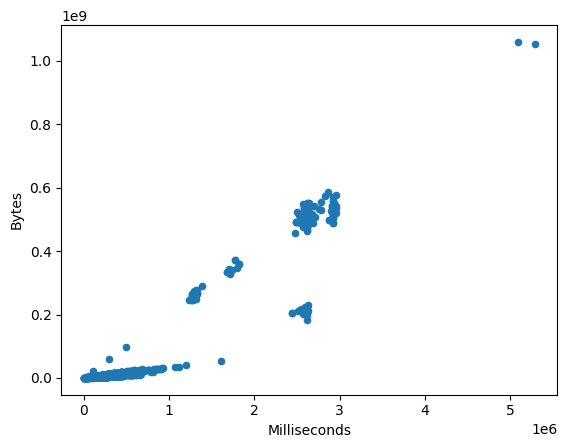

In [38]:
itunes_df.plot.scatter(x='Milliseconds', y='Bytes')
plt.show()

**Bar plot of Genre**

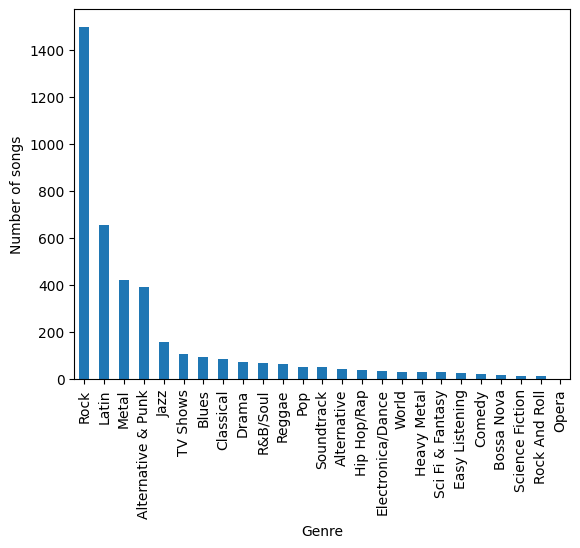

In [48]:
itunes_df['Genre'].value_counts().plot.bar()
plt.ylabel("Number of songs")
plt.show()

**Filtering Dataframes**

In [6]:
# Show songs with lengths over 4,000,000 ms
# The value itunes_df[''] > x, is called boolean mask
itunes_df[itunes_df['Milliseconds'] > 4e6]

,Track,Composer,Milliseconds,Bytes,UnitPrice,Genre,Album,Artist
2833,Occupation / Precipice,None,5286953,1054423946,1.99,TV Shows,"Battlestar Galactica, Season 3",Battlestar Galactica
2898,Through a Looking Glass,None,5088838,1059546140,1.99,Drama,"Lost, Season 3",Lost


In [7]:
# Boolean mask returns pandas Series with True or False values
# When applied to dataframe, it will result in rows where mask is True
itunes_df['Milliseconds'] > 4e6

0       False
1       False
2       False
3       False
4       False
        ...  
3498    False
3499    False
3500    False
3501    False
3502    False
Name: Milliseconds, Length: 4021, dtype: bool

In [8]:
# Show number of songs for each genre where length is over 2,000,000 ms
# The result we get indicates that these "songs" are not songs, but rather possibly e-books or shows
itunes_df[itunes_df['Milliseconds'] > 2e6]['Genre'].value_counts()

Genre
Drama               69
TV Shows            67
Sci Fi & Fantasy    31
Science Fiction     15
Comedy               2
Name: count, dtype: int64

In [11]:
# Show number of songs with length greater than 2e6 and size less than 0.4e9, by Genre
itunes_df[(itunes_df['Milliseconds'] > 2e6) & (itunes_df['Bytes'] < 0.4e9)]['Genre'].value_counts()

Genre
TV Shows    32
Name: count, dtype: int64

In [12]:
# Return all rows except those of 'TV Shows' Genre
itunes_df[itunes_df['Genre'] != 'TV Shows']
# itunes_df[~(itunes_df['Genre'] == 'TV Shows')] -> same as previous, but different syntax

,Track,Composer,Milliseconds,Bytes,UnitPrice,Genre,Album,Artist
1,Beira Mar,Gilberto Gil,295444,9597994,0.99,Latin,Unplugged,Eric Clapton
2,Brasil,"Milton Nascimento, Fernando Brant",155428,5252560,0.99,Latin,Milton Nascimento Ao Vivo,Milton Nascimento
3,Ben Franklin,NaN,1271938,264168080,1.99,Comedy,"The Office, Season 3",The Office
4,O Último Romântico (Ao Vivo),NaN,231993,7692697,0.99,Latin,Lulu Santos - RCA 100 Anos De Música - Álbum 02,Lulu Santos
5,Freewheel Burning,NaN,265952,8713599,0.99,Metal,Living After Midnight,Judas Priest
...,...,...,...,...,...,...,...,...
3498,Pini Di Roma (Pinien Von Rom) \ I Pini Della V...,None,286741,4718950,0.99,Classical,Respighi:Pines of Rome,Eugene Ormandy
3499,"String Quartet No. 12 in C Minor, D. 703 ""Quar...",Franz Schubert,139200,2283131,0.99,Classical,Schubert: The Late String Quartets & String Qu...,Emerson String Quartet
3500,"L'orfeo, Act 3, Sinfonia (Orchestra)",Claudio Monteverdi,66639,1189062,0.99,Classical,Monteverdi: L'Orfeo,"C. Monteverdi, Nigel Rogers - Chiaroscuro; Lon..."
3501,"Quintet for Horn, Violin, 2 Violas, and Cello ...",Wolfgang Amadeus Mozart,221331,3665114,0.99,Classical,Mozart: Chamber Music,Nash Ensemble


In [13]:
# Using string methods to filter genre containing the string "TV"
itunes_df[itunes_df['Genre'].str.contains('TV')]

,Track,Composer,Milliseconds,Bytes,UnitPrice,Genre,Album,Artist
0,All the Best Cowboys Have Daddy Issues,NaN,2555492,211743651,1.99,TV Shows,"Lost, Season 1",Lost
23,Confidence Man,NaN,2615244,223756475,1.99,TV Shows,"Lost, Season 1",Lost
38,Diwali,NaN,1279904,252726644,1.99,TV Shows,"The Office, Season 3",The Office
148,The 23rd Psalm,NaN,2610416,487401604,1.99,TV Shows,"Lost, Season 2",Lost
209,"Lost (Pilot, Part 2)",NaN,2436583,204995876,1.99,TV Shows,"Lost, Season 1",Lost
...,...,...,...,...,...,...,...,...
3210,The Merger,None,1801926,345960631,1.99,TV Shows,"The Office, Season 3",The Office
3253,Pilot,None,2484567,492670102,1.99,TV Shows,Aquaman,Aquaman
3344,Eggtown,None,2608817,501061240,1.99,TV Shows,"LOST, Season 4",Lost
3347,Ji Yeon,None,2588797,506458858,1.99,TV Shows,"LOST, Season 4",Lost


**Removing Data**

In [17]:
# Removing the 'Composer' column
itunes_df.columns

Index(['Track', 'Composer', 'Milliseconds', 'Bytes', 'UnitPrice', 'Genre',
       'Album', 'Artist'],
      dtype='object')

In [5]:
itunes_df.drop('Composer', axis=1, inplace=True) # axis=1 specifies column, instead of row
itunes_df.columns

Index(['Track', 'Milliseconds', 'Bytes', 'UnitPrice', 'Genre', 'Album',
       'Artist'],
      dtype='object')

In [20]:
# Removing non-music genres via filtering
itunes_df['Genre'].value_counts()

Genre
Rock                  1498
Latin                  656
Metal                  420
Alternative & Punk     393
Jazz                   160
TV Shows               105
Blues                   92
Classical               85
Drama                   71
R&B/Soul                69
Reggae                  64
Pop                     51
Soundtrack              50
Alternative             45
Hip Hop/Rap             40
Electronica/Dance       35
World                   32
Heavy Metal             31
Sci Fi & Fantasy        31
Easy Listening          28
Comedy                  20
Bossa Nova              17
Science Fiction         15
Rock And Roll           12
Opera                    1
Name: count, dtype: int64

In [6]:
only_music_df = itunes_df[~itunes_df['Genre'].isin(['Drama', 'TV Shows', 'Sci Fi & Fantasy', 'Science Fiction', 'Comedy'])]
only_music_df['Genre'].value_counts()

Genre
Rock                  1498
Latin                  656
Metal                  420
Alternative & Punk     393
Jazz                   160
Blues                   92
Classical               85
R&B/Soul                69
Reggae                  64
Pop                     51
Soundtrack              50
Alternative             45
Hip Hop/Rap             40
Electronica/Dance       35
World                   32
Heavy Metal             31
Easy Listening          28
Bossa Nova              17
Rock And Roll           12
Opera                    1
Name: count, dtype: int64

**Replace missing values with another value**

In [9]:
itunes_df.loc[itunes_df['Composer'].isna(), 'Composer'] = 'Unknown'
# can also do it this way:
#   itunes_df['Composer'].fillna('Unknown', inplace=True)

itunes_df[itunes_df['Composer'] == "Unknown"].sample(5, random_state=42).head() 

,Track,Composer,Milliseconds,Bytes,UnitPrice,Genre,Album,Artist
2947,Three Minutes,Unknown,2763666,531556853,1.99,TV Shows,"Lost, Season 2",Lost
98,Romance Ideal,Unknown,250070,8260477,0.99,Latin,Arquivo Os Paralamas Do Sucesso,Os Paralamas Do Sucesso
3327,Todo o Carnaval tem seu Fim,Unknown,237426,9499371,0.99,Electronica/Dance,Radio Brasil (O Som da Jovem Vanguarda) - Sele...,O Rappa
2457,We've Got To Get Together/Jingo,Unknown,1070027,34618222,0.99,Rock,Santana Live,Santana
587,Vamos Dançar,Unknown,226194,7617432,0.99,Latin,The Best of Ed Motta,Ed Motta


**Replace missing values with the most common value for the column**

In [11]:
# can also use `.mean` to replace missing values with the average value instead
itunes_df['UnitPrice'].fillna(itunes_df['UnitPrice'].mode(), inplace=True)